# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.\
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Описание данных\
•	Name — название игры\
•	Platform — платформа\
•	Year_of_Release — год выпуска\
•	Genre — жанр игры\
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)\
•	EU_sales — продажи в Европе (миллионы проданных копий)\
•	JP_sales — продажи в Японии (миллионы проданных копий)\
•	Other_sales — продажи в других странах (миллионы проданных копий)\
•	Critic_Score — оценка критиков (максимум 100)\
•	User_Score — оценка пользователей (максимум 10)\
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.


План работы:
1. Изучение и первичная предобработка данных;
2. Добавление суммарных продаж во всех регионах в таблицу;
3. Исследовательский анализ данных;
4. Описание портрета пользователя из каждого региона;
5. Проверка гипотез;
6. Общий вывод

## Изучение и первичная предобработка данных
Сначала откроем файл и изучим

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('/datasets/games.csv') 

In [3]:
df.head(10) # выведем первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info() # выводим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наблюдаем несколько проблем: 
- Названия столбцов оформлены криво, необходимо перевести все в нижний регистр;
- Присутствую пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating;
- У некоторых столбцов необходимо поменять тип данных: Year_of_Release на int, User_Score на float

Начнем с переименования столбцов

In [5]:
# переименуем столбцы 
df = df.rename(
    columns={
        'Name':'name', 
        'Platform':'platform',        
        'Year_of_Release':'release_year',
        'Genre':'genre',
        'NA_sales':'na_sales',
        'EU_sales':'eu_sales',
        'JP_sales':'jp_sales',
        'Other_sales':'other_sales',
        'Critic_Score':'critic_score',
        'User_Score':'user_score',
        'Rating':'rating',
    } 
)

In [6]:
df.columns # смотрим результат

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия успешно заменились. Проверим теперь датасет на наличие явных и неявных дубликатов.

In [7]:
df.duplicated().sum() # проверим явные дубликаты

0

In [8]:
df['platform'].unique() # проверим неявные дубликаты

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
df['genre'].unique() # проверим неявные дубликаты

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
df['rating'].unique() # проверим неявные дубликаты

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
df['user_score'].unique() # проверим правильность значений

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df[df['user_score'] == 'tbd'] # кол-во tbd в датасете

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


Дубликатов не найдено, зато в столбце user_score имеется странный показатель tbd, который присутствует в 2424 строках. Скорее всего он означает, что на данную игру пользователи не оставили отзывов. Поэтому поменяем все tbd на None.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', None) # заменя tbd на None

In [14]:
df[df['user_score'] == 'tbd'].sum()

name           0.00
platform       0.00
release_year   0.00
genre          0.00
na_sales       0.00
eu_sales       0.00
jp_sales       0.00
other_sales    0.00
critic_score   0.00
user_score     0.00
rating         0.00
dtype: float64

Значения успешно заменены. Посмотрим на пропущеные значения в столбце release_year и genre. В них содержится информация, важная для исследования, так как мы рассматриваем разные периоды. Учитывая, что этих строк в датасете мало, проще их будет удалить.

In [15]:
df = df.dropna(subset=['release_year'])
df = df.dropna(subset=['genre'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   release_year  16444 non-null  float64
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    8609 non-null   object 
 10  rating        9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Строки удалены. Дальше поменяем типы данных.

In [17]:
df['release_year'] = df['release_year'].astype('int64') 

In [18]:
df['user_score'] = df['user_score'].apply(pd.to_numeric)

In [19]:
df['user_score'] = df['user_score'].astype('float64')

In [20]:
df.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   release_year  16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    8609 non-null   float64
 10  rating        9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


После проверки видим, что типы успешно заменены.

## Добавление новых данных
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] # добавление нового столбца

In [22]:
df['total_sales'].isna().sum() # проверка

0

In [23]:
df.head() # проверка

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


Столбец добавлен успешно. Пропусков нет.

## Исследовательский анализ данных
### Выпуск игр по годам

Для начала рассмотрим сколько игр выпускалось в разные годы. Для этого сделаем сводную таблицу и нарисуем гистограму.

In [24]:
games_released = df.pivot_table(index='release_year', values=['name', 'total_sales'], aggfunc={'name':'count', 'total_sales':'sum'})
games_released.head()

,name,total_sales
release_year,,
1980,9,11.26
1981,46,35.36
1982,36,28.57
1983,17,16.66
1984,14,49.65


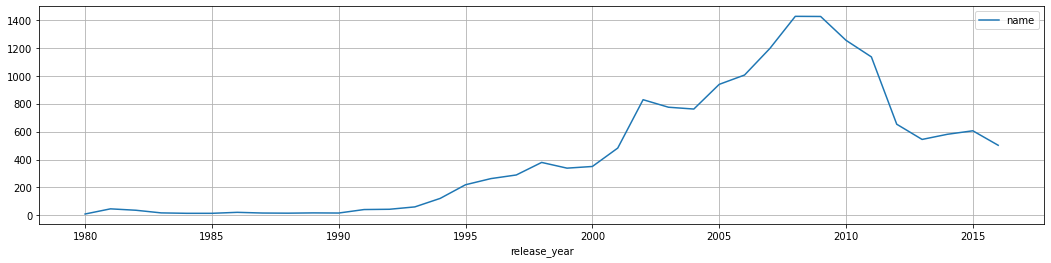

In [25]:
games_released.plot(figsize=(18, 4), y='name', grid=True);

Можно увидеть, что вплоть до середины 90 годов игры только начинали популяризироваться, но рост начался ближе ко второй половине 90х. С 2000 виден тренд на увеличение продаж и в целом выпуск игр резко увеличился. С 2010 наблюдается спад в выручке с продаж, который может быть связан с изменением модели монетизации игр и увеличением доли мобильного гейминга. Так как в данных содержатся данные с 1980 года, то можно уменьшить рамки для анализа, ведь рынок за это время успел поменяться не раз и сами игры и их целевые аудитории за это время серьезно поменялись. Попробуем взять данные хотя бы с начала 2000, когда игры стали бурно расти, и до текущего времени.

In [26]:
df = df.query('release_year >= 2000') # берем все данные с 2000 год

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          14470 non-null  object 
 1   platform      14470 non-null  object 
 2   release_year  14470 non-null  int64  
 3   genre         14470 non-null  object 
 4   na_sales      14470 non-null  float64
 5   eu_sales      14470 non-null  float64
 6   jp_sales      14470 non-null  float64
 7   other_sales   14470 non-null  float64
 8   critic_score  7887 non-null   float64
 9   user_score    8511 non-null   float64
 10  rating        9663 non-null   object 
 11  total_sales   14470 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


### Выпуск игр по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [28]:
platforms_stat = df.pivot_table(index='platform', values=['name', 'total_sales'], aggfunc={'name':'count', 'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
platforms_stat # берем информацию по платформам

,name,total_sales
platform,,
PS2,2127,"1,043.09"
X360,1232,876.36
Wii,1286,813.47
PS3,1306,796.75
DS,2120,743.72
GBA,811,305.27
PS4,392,265.79
PSP,1193,248.77
3DS,512,244.54


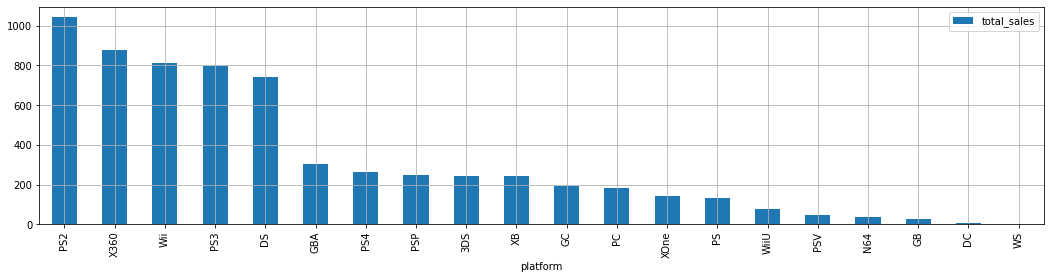

In [29]:
platforms_stat.plot(kind='bar', figsize=(18, 4), y='total_sales', grid=True); # строим гистрограмму продаж по платформам за всё время

In [30]:
games_released_by_platform = df.pivot_table(index=('platform', 'release_year'), values=['name', 'total_sales'], aggfunc={'name':'count', 'total_sales':'sum'})
games_released_by_platform # данные по платформам по годам

name  total_sales
platform release_year                   
3DS      2011           116        58.80
         2012            93        48.77
         2013            91        53.97
         2014            80        41.75
         2015            86        26.75
...                     ...          ...
XB       2008             1         0.17
XOne     2013            19        17.21
         2014            61        49.26
         2015            80        54.67
         2016            87        23.91

[150 rows x 2 columns]

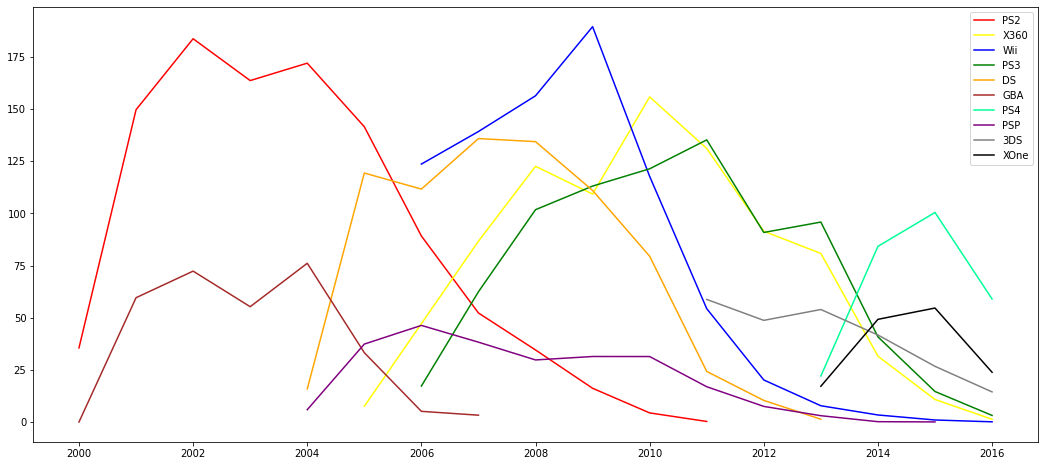

In [31]:
fig, ax = plt.subplots()  # топ 10 платформ по продажам
fig = plt.gcf()
fig.set_size_inches(18,8)
ax.plot(games_released_by_platform['total_sales'].loc['PS2'], label = 'PS2', color='red')
ax.plot(games_released_by_platform['total_sales'].loc['X360'], label = 'X360', color='yellow')
ax.plot(games_released_by_platform['total_sales'].loc['Wii'], label = 'Wii', color='blue')
ax.plot(games_released_by_platform['total_sales'].loc['PS3'], label = 'PS3', color='green')
ax.plot(games_released_by_platform['total_sales'].loc['DS'], label = 'DS', color='orange')
ax.plot(games_released_by_platform['total_sales'].loc['GBA'], label = 'GBA', color='brown')
ax.plot(games_released_by_platform['total_sales'].loc['PS4'], label = 'PS4', color='#00FF98')
ax.plot(games_released_by_platform['total_sales'].loc['PSP'], label = 'PSP', color='purple')
ax.plot(games_released_by_platform['total_sales'].loc['3DS'], label = '3DS', color='grey')
ax.plot(games_released_by_platform['total_sales'].loc['XOne'], label = 'XOne', color='black')
plt.legend(loc ="upper right")
plt.show() 

По платформам можем сделать вывод, что в среднем они держатся от 5 до 8 лет. В отдельных случаях консоли проживают и по 10 лет. Так же есть платформа PC, которая неизменно остаётся на графике на всём промежутке. Видим что в основном большие консоли как XBOX, PS2 и PS3 и Wii держатся дольше всех и по выручке обгоняют все другие. Среди карманных консолей лидирует DS, остальные не догоняют её по выручке, но у них примерно одинаковый рыночный срок жизни. На данном этапе видно, что после того как цикл у консоли закончился, её заменяет более новая версия.

### Анализ актуального периода

Учитывая, что поколения платформ постоянно меняются и за кажой старой версией выходит новая, можем найти момент, когда стали появлятся платформы нового поколения и с них определить актуальный период. На момент перехода поколений видно, что новые консоли начали выходить с 2012 года: с этого момента и будем считать. Так как у нас 2016 год содержит неполную информацию, то его в данный период мы включать тоже пока не будем.

In [32]:
df_now = df.query('2016 >= release_year >= 2012')
df_now.info() # продажи начиная с 2012 года

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2886 non-null   object 
 1   platform      2886 non-null   object 
 2   release_year  2886 non-null   int64  
 3   genre         2886 non-null   object 
 4   na_sales      2886 non-null   float64
 5   eu_sales      2886 non-null   float64
 6   jp_sales      2886 non-null   float64
 7   other_sales   2886 non-null   float64
 8   critic_score  1312 non-null   float64
 9   user_score    1581 non-null   float64
 10  rating        1611 non-null   object 
 11  total_sales   2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [33]:
df_now_sales = df_now.pivot_table(index=('platform', 'release_year'), values='total_sales', aggfunc='sum')
df_now_sales # сводная таблица по годам и платформам

total_sales
platform release_year             
3DS      2012                48.77
         2013                53.97
         2014                41.75
         2015                26.75
         2016                14.50
DS       2012                10.42
         2013                 1.42
PC       2012                20.41
         2013                11.27
         2014                12.38
         2015                 7.93
         2016                 4.89
PS3      2012                90.87
         2013                95.85
         2014                40.88
         2015                14.70
         2016                 3.23
PS4      2013                22.12
         2014                84.22
         2015               100.44
         2016                59.01
PSP      2012                 7.56
         2013                 3.10
         2014                 0.24
         2015                 0.12
PSV      2012                13.65
         2013                 9.14
         2014                10.56
         2015                 5.93
         2016                 4.10
Wii      2012                20.22
         2013                 7.87
         2014                 3.45
         2015                 1.05
         2016                 0.17
WiiU     2012                16.30
         2013                20.12
         2014                20.35
         2015                15.22
         2016                 4.25
X360     2012                91.45
         2013                80.82
         2014                31.61
         2015                10.86
         2016                 1.40
XOne     2013                17.21
         2014                49.26
         2015                54.67
         2016                23.91

#### Анализ продаж
Ответим на вопросы: какие платформы лидируют по продажам, растут или падают? Найдем потенциально прибыльных платформы.
Для этого построим линейные графики для каждой платформы и опишем.

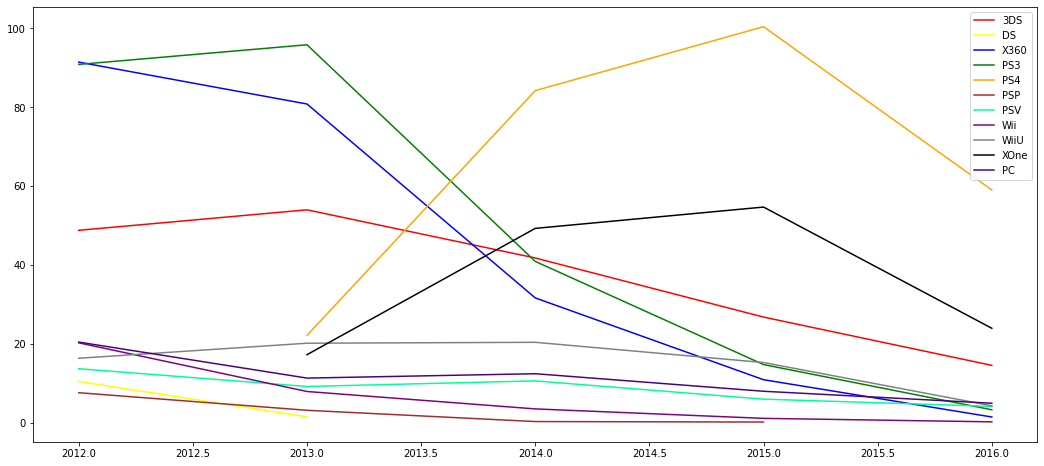

In [34]:
fig, ax = plt.subplots()  # графиц по актуальному периоду
fig = plt.gcf()
fig.set_size_inches(18,8)
ax.plot(df_now_sales['total_sales'].loc['3DS'], label = '3DS', color='red')
ax.plot(df_now_sales['total_sales'].loc['DS'], label = 'DS', color='yellow')
ax.plot(df_now_sales['total_sales'].loc['X360'], label = 'X360', color='blue')
ax.plot(df_now_sales['total_sales'].loc['PS3'], label = 'PS3', color='green')
ax.plot(df_now_sales['total_sales'].loc['PS4'], label = 'PS4', color='orange')
ax.plot(df_now_sales['total_sales'].loc['PSP'], label = 'PSP', color='brown')
ax.plot(df_now_sales['total_sales'].loc['PSV'], label = 'PSV', color='#00FF98')
ax.plot(df_now_sales['total_sales'].loc['Wii'], label = 'Wii', color='purple')
ax.plot(df_now_sales['total_sales'].loc['WiiU'], label = 'WiiU', color='grey')
ax.plot(df_now_sales['total_sales'].loc['XOne'], label = 'XOne', color='black')
ax.plot(df_now_sales['total_sales'].loc['PC'], label = 'PC', color='indigo')
plt.legend(loc ="upper right")
plt.show() 

Здесь можем наблюдать, что консоли старого поколения начали снижение в тот момент, как новое их сменило. Это касается в первую очередь X360, PS3 - они одновременно начали падать вниз. 3DS не сильно подвеглось этому тренду, но тоже падает. Wii еще в 2013 году прекратила свою поддержку, но до сих пор приносит какую-то прибыль, хотя база у неё снижаться начала еще до актуального периода и продолжает падение. WiiU с другой стороны вышла только в 2012 году, и за это время не смогла улучшить свои позиции с того момента. PSV на данном графике падает, но не так сильно, потому что на её смену нет платформы, поэтому она еще держит свою актуальность Самые перспективные консоли это PS4 и XOne, с момента их выхода в 13 году наблюдается стабильный рост и, скорее всего, он будет продолжаться.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат. Для этого отберем топ 6 платформ за прошлый год по выручке и построим график.

In [35]:
# фильтр
(
    df_now
    .query('release_year == 2016')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
    .head(6)
)

,total_sales
platform,
PS4,59.01
XOne,23.91
3DS,14.50
PC,4.89
WiiU,4.25
PSV,4.10


In [36]:
name = ['XOne', 'PS4', '3DS', 'WiiU', 'PC', 'PSV'] # делаем таблицу для графика
df_now_boxplot = df_now[df_now['platform'].isin(name)]

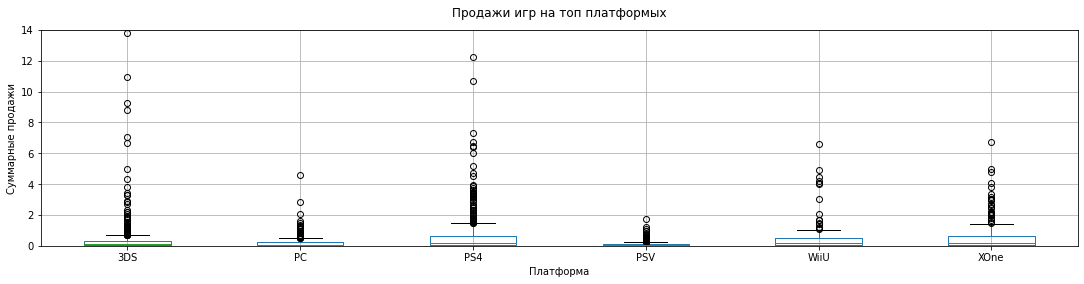

In [37]:
df_now_boxplot.boxplot('total_sales', by='platform', figsize=(18,4)); # строим "ящик с усами"
plt.ylim(0, 14)
plt.suptitle('Продажи игр на топ платформых')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Суммарные продажи')
plt.show()

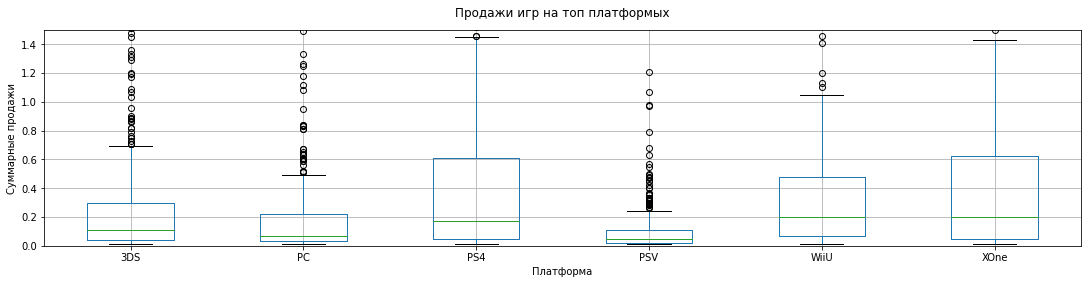

In [38]:
df_now_boxplot.boxplot('total_sales', by='platform', figsize=(18,4)); # приблизим
plt.ylim(0, 1.5)
plt.suptitle('Продажи игр на топ платформых')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Суммарные продажи')
plt.show()

На графике видим много аномалий у 3DS, PS4, поменьше у WiiU и XOne, мньше всего у PC и PSV. У XOne и PS4 разброс квартилей больше, чем у других, среднее и медиана у них примерно на одинаковом уровне, что означает примерно одинаковый уровень продаж. Но Медиана у всех платформ ближе тянется к нижней планке средней, ниже всего она у PSV и PC. PSV по всем показателям занимает последнее место по сравнению со всеми платформами, даже с PC. У PC разброс немного больше, но все равно маленький. По сравнению с остальными платформами у 3DS имеются много аномалий, превышающие даже PS4 и XOne, но среднее и медиана у неё близятся к низу.

#### Влияние рейтинга на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. В данном разделе возьмем несколько разных платформ и проведем анализ: 'XOne', 'PS4', '3DS', 'PC'.

In [39]:
xone_review = df_now.loc[df['platform'] == 'XOne'] # выделим данные с отдельной платформой для анализа
xone_review

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,6.71
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.00,7.90,M,5.00
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.00,5.40,M,4.78
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.00,6.40,T,4.08
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.00,6.20,M,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.00,8.20,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.60,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.00,6.70,NaN,0.01


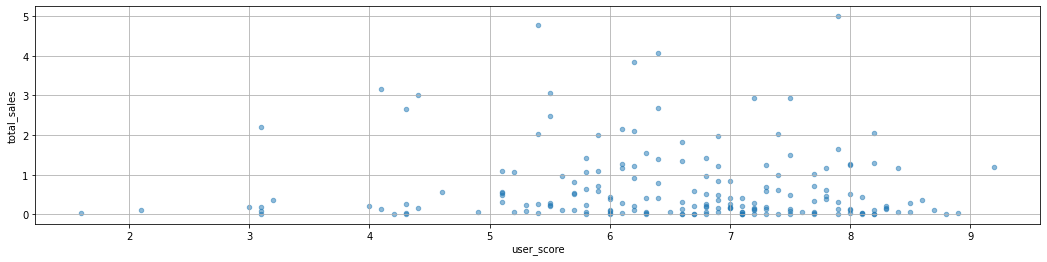

In [40]:
xone_review.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(18,4), grid=True); #диаграмма рассеяния

In [41]:
user_to_price_corr_xone = xone_review['user_score'].corr(xone_review['total_sales']) 
f'Коэффициент корреляции между показателями составляет: {user_to_price_corr_xone:.2f}'

'Коэффициент корреляции между показателями составляет: -0.07'

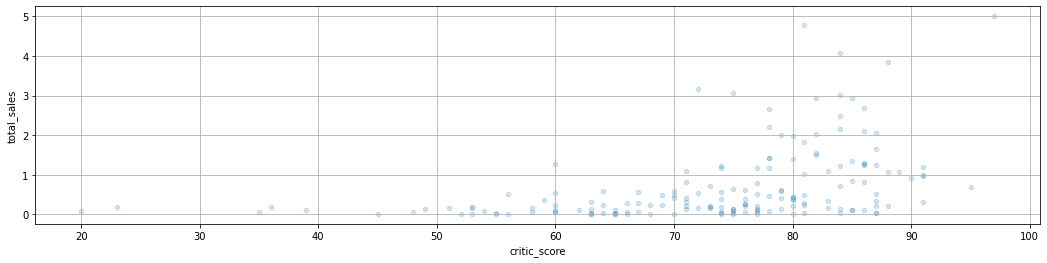

In [42]:
xone_review.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2, figsize=(18,4), grid=True); #диаграмма рассеяния

In [43]:
critics_to_price_corr_xone = xone_review['critic_score'].corr(xone_review['total_sales'])
f'Коэффициент корреляции между показателями составляет: {critics_to_price_corr_xone:.2f}'

'Коэффициент корреляции между показателями составляет: 0.42'

По диаграмме с пользователями и продажами заметно, что рейтинг пользователей напрямую не влияет на продажи. Оценка критиков тоже практически никакого эффекта на продажи игр не имеет. Попробуем для сравнения посмотреть другие платформы.


In [44]:
ps4_review = df_now.loc[df['platform'] == 'PS4'] # выделим данные с отдельной платформой для анализа

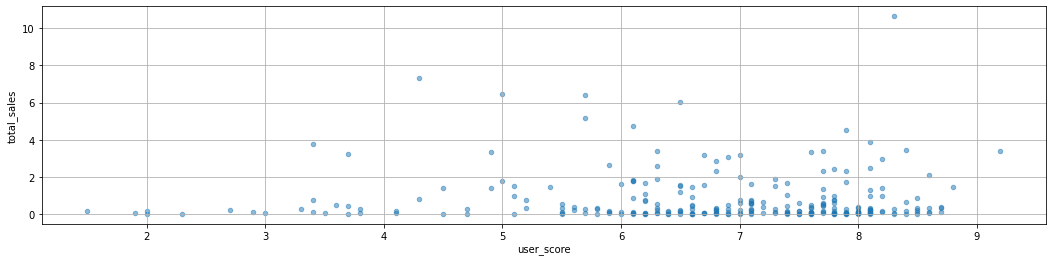

In [45]:
ps4_review.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(18,4), grid=True); #диаграмма рассеяния

In [46]:
user_to_price_corr_ps4 = ps4_review['user_score'].corr(ps4_review['total_sales']) 
f'Коэффициент корреляции между показателями составляет: {user_to_price_corr_ps4:.2f}'

'Коэффициент корреляции между показателями составляет: -0.03'

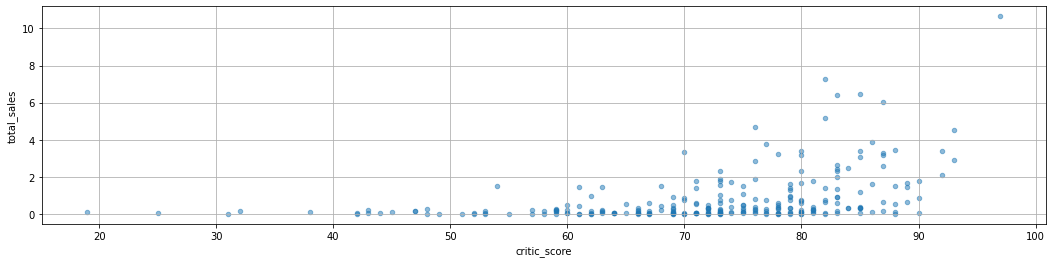

In [47]:
ps4_review.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(18,4), grid=True); #диаграмма рассеяния

In [48]:
critics_to_price_corr_ps4 = ps4_review['critic_score'].corr(ps4_review['total_sales'])
f'Коэффициент корреляции между показателями составляет: {critics_to_price_corr_ps4:.2f}'

'Коэффициент корреляции между показателями составляет: 0.41'

Здесь наблюдаем такую же ситуацию, как и с XOne, корреляция слабо выражена в обоих примерах. Попробуем посмотреть другой тип платформ.

In [49]:
DS3_review = df_now.loc[df['platform'] == '3DS'] # выделим данные с отдельной платформой для анализа

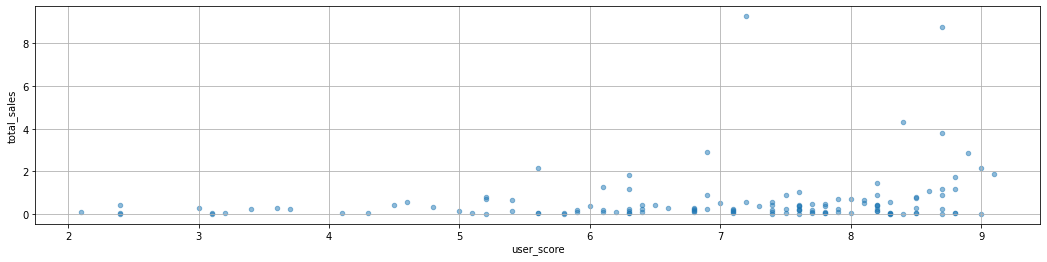

In [50]:
DS3_review.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(18,4), grid=True); #диаграмма рассеяния

In [51]:
user_to_price_corr_DS3 = DS3_review['user_score'].corr(DS3_review['total_sales']) 
f'Коэффициент корреляции между показателями составляет: {user_to_price_corr_DS3:.2f}'

'Коэффициент корреляции между показателями составляет: 0.20'

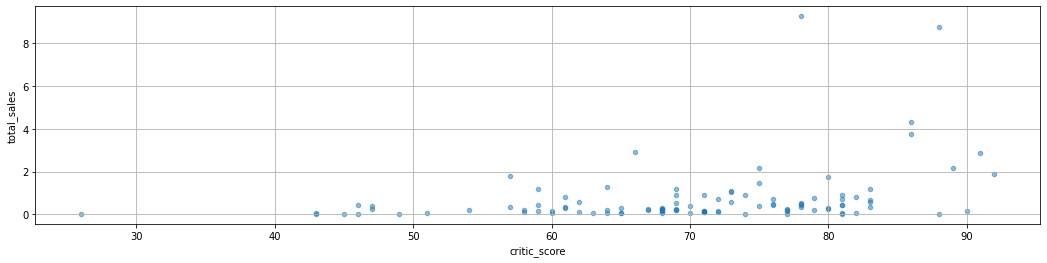

In [52]:
DS3_review.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(18,4), grid=True); #диаграмма рассеяния

In [53]:
critics_to_price_corr_DS3 = DS3_review['critic_score'].corr(DS3_review['total_sales'])
f'Коэффициент корреляции между показателями составляет: {critics_to_price_corr_DS3:.2f}'

'Коэффициент корреляции между показателями составляет: 0.32'

Попробуем посмотреть, может ситуация с компьютерами отличается от других платформ.

In [54]:
pc_review = df_now.loc[df['platform'] == 'PC'] # выделим данные с отдельной платформой для анализа

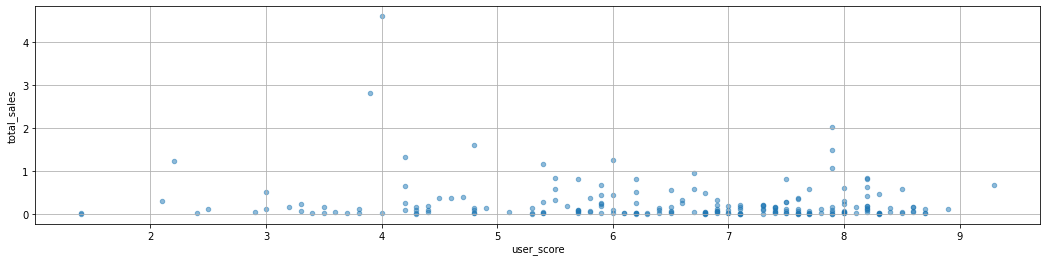

In [55]:
pc_review.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(18,4), grid=True); #диаграмма рассеяния

In [56]:
user_to_price_corr_pc = pc_review['user_score'].corr(pc_review['total_sales']) 
f'Коэффициент корреляции между показателями составляет: {user_to_price_corr_pc:.2f}'

'Коэффициент корреляции между показателями составляет: -0.13'

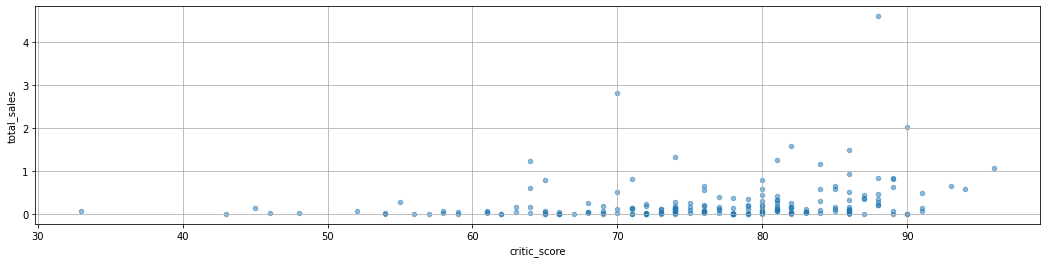

In [57]:
pc_review.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(18,4), grid=True); #диаграмма рассеяния

In [58]:
critics_to_price_corr_pc = pc_review['critic_score'].corr(pc_review['total_sales'])
f'Коэффициент корреляции между показателями составляет: {critics_to_price_corr_pc:.2f}'

'Коэффициент корреляции между показателями составляет: 0.24'

Как видим коэффициент показывает отсутствие линейной зависимости этих параметрой для разных платформ, независимо от года выхода или её суммарных продаж. Можем сделать вывод, что рейтинг не влияет на продаваемость игр.

### Анализ по жанрам
Посмотрим на общее распределение игр по жанрам. Опишем продажи и выпуск.

In [59]:
genre_data = df_now.pivot_table(index='genre', values=['name', 'total_sales'], aggfunc={'name':'count', 'total_sales':'sum'}) 
# сделаем сводную таблицу по жанрам

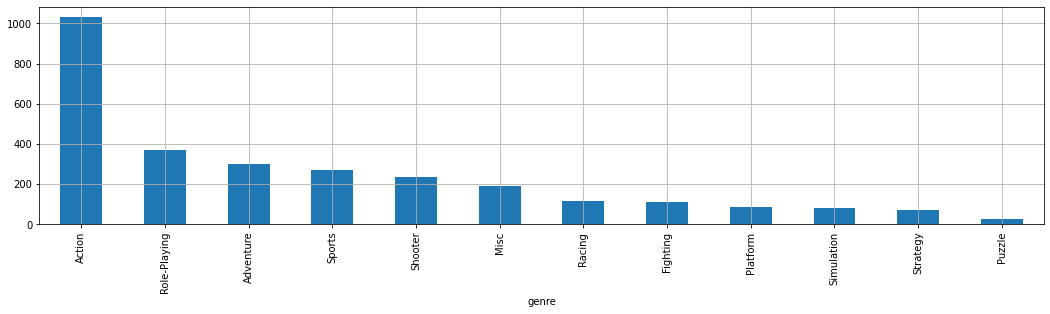

In [60]:
genre_data['name'].sort_values(ascending=False).plot(kind='bar' ,figsize=(18,4), grid=True);
# построим распределение игр по жанрам

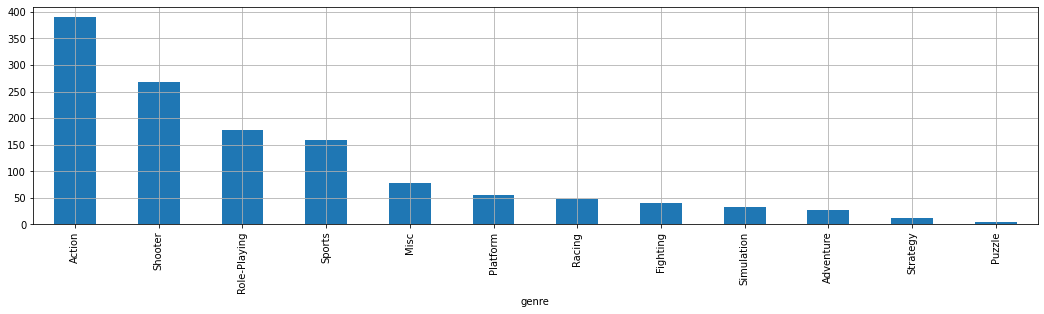

In [61]:
genre_data['total_sales'].sort_values(ascending=False).plot(kind='bar' ,figsize=(18,4), grid=True);
# посмтром распредение выручки по жанрам

По графикам распределения видим, что лидирует по продамам и выручше Action и отстаёт от ближайшего места на 30% и по продажам, и по выручке. Второе место так же по обоим пунктам занимает Sports. Дальше распределние уменьшается плавно и места занимают жанры разные. Так, например, шутер по выручке занимает второе место, а по продажам всего лишь 6. Жанры Stratyge и Puzzle оба находятся на последний местах и примерно равны по продажам и выпуску. Еще интересное наблюдение по Adventure, где по выпуску игр жанр занимает 5 место, а по выручке 10, что делает этот жанр совсем не выгодным.\
Но чтобы оценить прибыльность попробуем рассмотреть сколько выручки приходится на каждую игру, выделим топ по продажам и рассмотрим среднее и медиану.

In [62]:
genre_data['percent'] = genre_data['total_sales'] / genre_data['name'] # добавляем новую метрику
genre_data.sort_values(by='percent',ascending=False)

,name,total_sales,percent
genre,,,
Shooter,235,267.47,1.14
Platform,85,55.42,0.65
Sports,268,158.63,0.59
Role-Playing,370,177.97,0.48
Simulation,80,32.93,0.41
Racing,115,47.01,0.41
Misc,192,77.37,0.40
Action,1031,389.98,0.38
Fighting,109,40.02,0.37


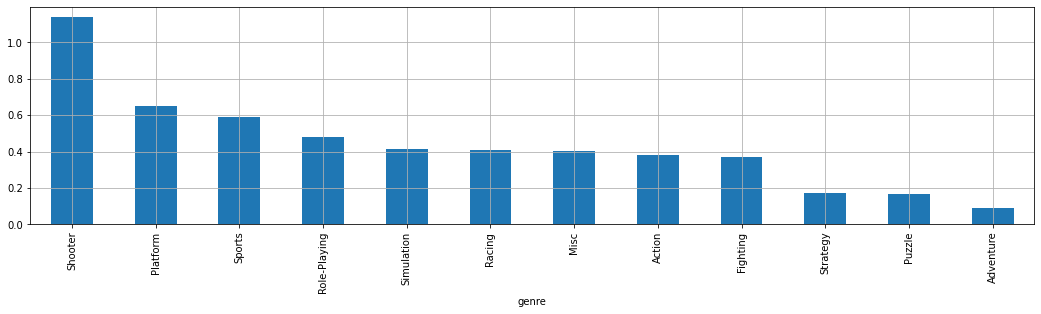

In [63]:
genre_data['percent'].sort_values(ascending=False).plot(kind='bar' ,figsize=(18,4), grid=True); # строим гистограмму

In [64]:
df_now.loc[df_now['genre'] == 'Shooter', 'total_sales'].describe() # среднее, медиана, отклонение жанра Shooter

count   235.00
mean      1.14
std       1.96
min       0.01
25%       0.12
50%       0.38
75%       1.28
max      12.56
Name: total_sales, dtype: float64

In [65]:
df_now.loc[df_now['genre'] == 'Platform', 'total_sales'].describe() # среднее, медиана, отклонение жанра Platform

count   85.00
mean     0.65
std      1.27
min      0.01
25%      0.07
50%      0.19
75%      0.61
max      9.27
Name: total_sales, dtype: float64

In [66]:
df_now.loc[df_now['genre'] == 'Sports', 'total_sales'].describe() # среднее, медиана, отклонение жанра Sports

count   268.00
mean      0.59
std       0.97
min       0.01
25%       0.07
50%       0.22
75%       0.64
max       7.30
Name: total_sales, dtype: float64

In [67]:
df_now.loc[df_now['genre'] == 'Role-Playing', 'total_sales'].describe() # среднее, медиана, отклонение жанра Role-Playing

count   370.00
mean      0.48
std       1.22
min       0.01
25%       0.06
50%       0.14
75%       0.38
max      13.82
Name: total_sales, dtype: float64

In [68]:
df_now.loc[df_now['genre'] == 'Racing', 'total_sales'].describe() # среднее, медиана, отклонение жанра Racing

count   115.00
mean      0.41
std       0.80
min       0.01
25%       0.04
50%       0.12
75%       0.35
max       6.58
Name: total_sales, dtype: float64

По всем показателям лидирует жанр Shooter, он показывает все признаки прибыльности. У него медиана выше, чем у остальных жанров, средняя тоже, по максимуму его обгоняет только Role-Playing, но у него и медиана и средняя почти в два раза меньше.

## Портрет пользователя региона
Определим для пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5)


In [69]:
na_name = df_now.pivot_table(index=('platform'), values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_name # топ 5 платформ в Северной Америке

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [70]:
eu_name = df_now.pivot_table(index=('platform'), values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_name # топ 5 платформ в Европе

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [71]:
jp_name = df_now.pivot_table(index=('platform'), values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_name # топ 5 платформ в Японии

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


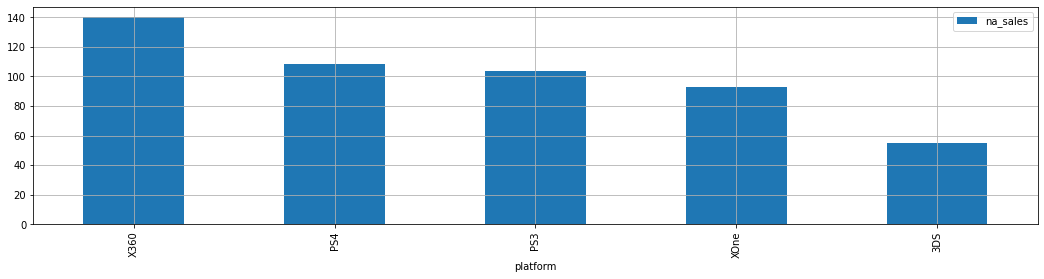

In [72]:
na_name.plot(kind='bar' ,figsize=(18,4), grid=True); # гистограмма топ 5 платформ в Северной Америке

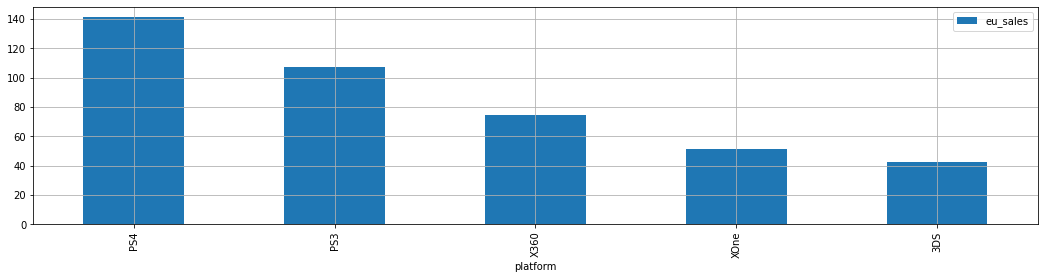

In [73]:
eu_name.plot(kind='bar' ,figsize=(18,4), grid=True); # гистограмма топ 5 платформ в Европе

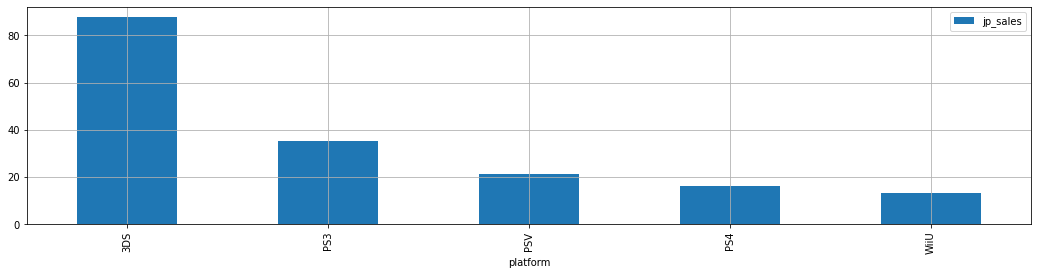

In [74]:
jp_name.plot(kind='bar' ,figsize=(18,4), grid=True); # гистограмма топ 5 платформ в Японии

Для каждого региона видны свои предпочтения. У Европы и Северной Америки большие приставки находятся в топе: Xbox и PS, но в Европе на PS больше выручка, чем на xbox, а в Северной Америке даже с выходом нового поколения все-равно лидирует X360, так же в Европе продажи Xbox в целом меньше чем PS, даже в учетом новых платформ, она более популярна в Америке.

Японский рынок кардинально отличается от Европы и Америки, тут 3DS сильно обгоняет по продажам остальных конкурентов. Можно еще заметить, что в Японском сегменте в топе не присутствует Xbox, в основном только продукция PS и Nintendo, так же заметно, что Японцы отдают предпочтение карманным платформам: они занимают 4 места из 5 в топе по продажам. 

### Самые популярные жанры (топ-5)

In [75]:
na_genres = df_now.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_genres # топ 5 в Северной Америке

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [76]:
eu_genres = df_now.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_genres # топ 5 в Европе

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [77]:
jp_genres = df_now.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_genres # топ 5 в Японии

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


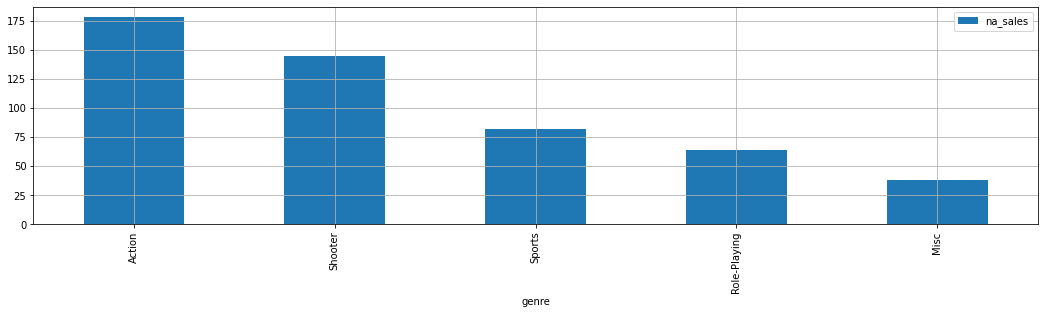

In [78]:
na_genres.plot(kind='bar' ,figsize=(18,4), grid=True);

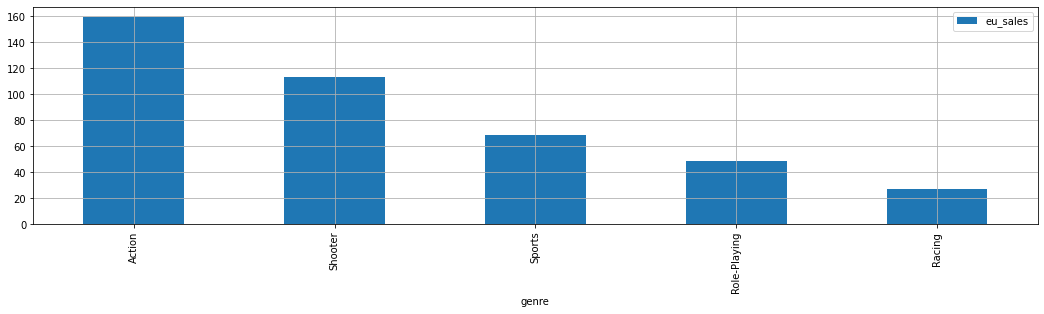

In [79]:
eu_genres.plot(kind='bar' ,figsize=(18,4), grid=True);

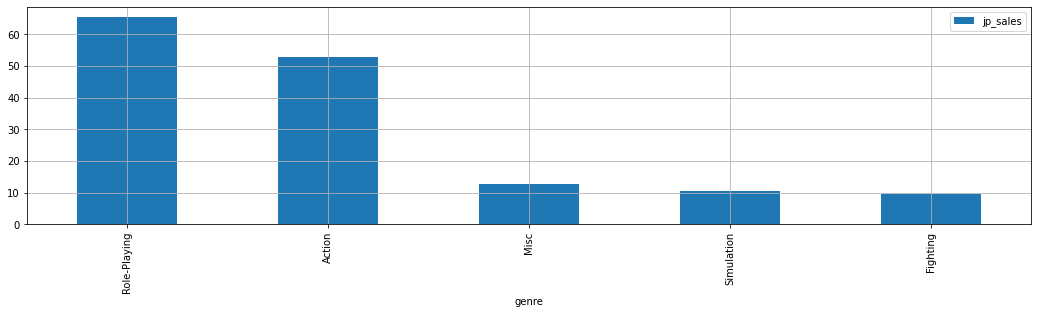

In [80]:
jp_genres.plot(kind='bar' ,figsize=(18,4), grid=True);

В целом здесь картина между Европой и Америкой похожа, немного шутеры в Америке продаются лучше, но в целом практически все так же. В Японии жарны сильно отличаются, Role-Playing занимает первое место, Action занимает второе, а уже далеко внизу остальные жанры.

### 	Влияние рейтинг ESRB на продажи

In [81]:
na_esrb = df_now.fillna('no_rating')
na_esrb = na_esrb.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_esrb['percent'] = na_esrb['na_sales'] / na_esrb['na_sales'].sum()
na_esrb

,na_sales,percent
rating,,
M,231.57,0.39
E,114.37,0.19
no_rating,103.31,0.17
E10+,75.70,0.13
T,66.02,0.11


In [82]:
eu_esrb = df_now.fillna('no_rating')
eu_esrb = eu_esrb.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_esrb['percent'] = eu_esrb['eu_sales'] / eu_esrb['eu_sales'].sum()
eu_esrb

,eu_sales,percent
rating,,
M,193.96,0.38
E,113.03,0.22
no_rating,91.50,0.18
E10+,55.37,0.11
T,52.96,0.10


In [83]:
jp_esrb = df_now.fillna('no_rating')
jp_esrb = jp_esrb.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_esrb['percent'] = jp_esrb['jp_sales'] / jp_esrb['jp_sales'].sum()
jp_esrb

,jp_sales,percent
rating,,
no_rating,108.84,0.57
E,28.33,0.15
T,26.02,0.14
M,21.20,0.11
E10+,8.19,0.04


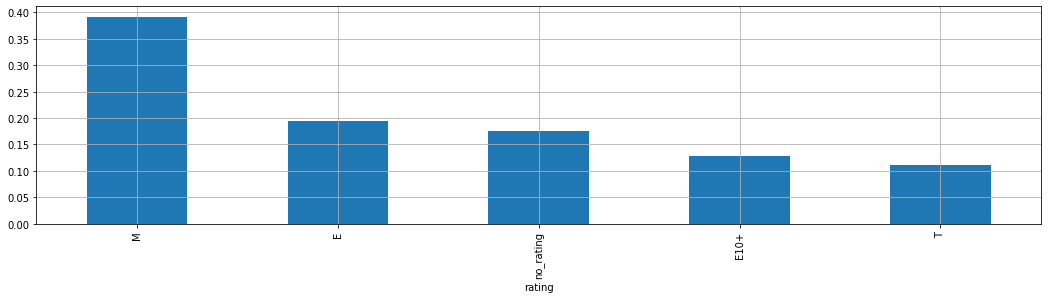

In [84]:
na_esrb['percent'].plot(kind='bar' ,figsize=(18,4), grid=True);

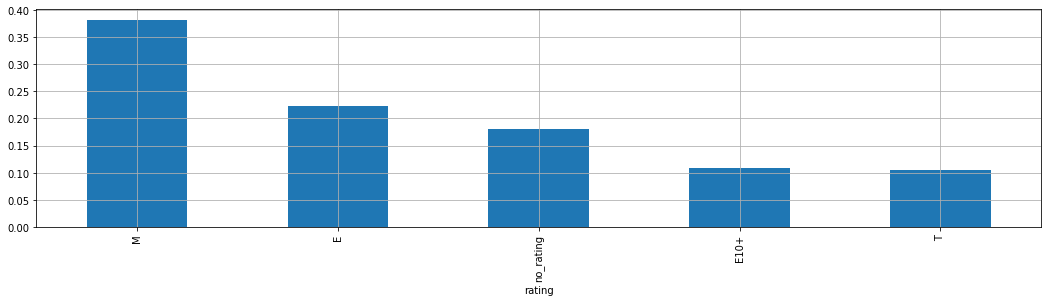

In [85]:
eu_esrb['percent'].plot(kind='bar' ,figsize=(18,4), grid=True);

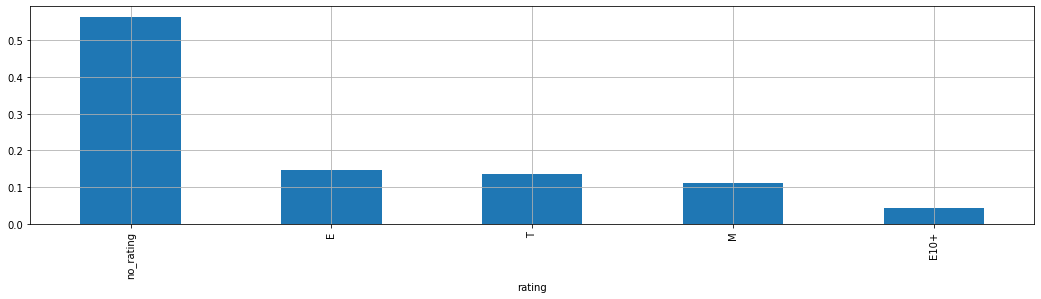

In [86]:
jp_esrb['percent'].plot(kind='bar' ,figsize=(18,4), grid=True);

Как и в предыдущих анализах, здесь так же видим что между Европой и Америкой разница не так велика, У Японии все иначе. Рейтинг 17+ занимает почти 40% рынка, почти 20% игр не присвоен рейтинг что в Европе, что в Америке, поэтому распределение может поменяться, но и без них отрыв у 17+ довольно большой.\
В Японии ESRB не так сильно распространен как на западе, поэтому больше чем у половины игр отсутствует рейтинг. В Японском сегменте присутствует своя система возрастного определения игрового контента CERO, поэтому здесь необходимо учитывать специфику региона и для корректного сравнения добавлять данные и оттуда.

## Проверьте гипотезы
### Рейтинги платформ Xbox One и PC одинаковые;



Проверим через гипотезу о равенстве средних двух генеральных совокупностей. Так как мы имеем две генеральные совокупности, то этот метод нам как раз подходит. Сформируем нулевую и альтернатвную гипотезу:\
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.\
Критический уровень статистической значимости выберем 5%, этого уровня для задачи нам хватит. \
Сначала сделаем две отфильтрованные таблицы по платформам и затем проверим гипотезу.

In [87]:
xbox_one_review = df_now.loc[df_now['platform'] == 'XOne'].copy().dropna(subset=['user_score'])
xbox_one_review # платформа Xbox

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.00,7.90,M,5.00
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.00,5.40,M,4.78
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.00,6.40,T,4.08
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.00,6.20,M,3.84
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.00,4.10,M,3.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,6.80,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.00,6.00,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.00,8.20,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.60,E,0.01


In [88]:
pc_review = df_now.loc[df_now['platform'] == 'PC'].copy().dropna(subset=['user_score'])
pc_review # платформа pc

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.00,4.00,M,4.60
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.00,0.23,70.00,3.90,T,2.82
688,Guild Wars 2,PC,2012,Action,0.96,1.07,0.00,0.27,90.00,7.90,T,2.03
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.00,0.22,82.00,4.80,T,1.60
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.00,0.18,86.00,7.90,T,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.00,0.00,79.00,6.80,E,0.01
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.00,0.00,78.00,7.90,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.40,E,0.01
16584,Transformers: Fall of Cybertron,PC,2012,Action,0.01,0.00,0.00,0.00,78.00,7.90,T,0.01


In [89]:
alpha = .05  # проверяем гипотезы

results_one = st.ttest_ind(xbox_one_review['user_score'], pc_review['user_score'])

print('p-значение:', round(results_one.pvalue, 5))

if results_one.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.57472
Не получилось отвергнуть нулевую гипотезу


По результатам видим, что значение выше критического уровня, поэтому гипотезу отвергнуть не получилось.

### Рейтинги жанров Action и Sports разные.

В этом примере так же имеются две генеральные совокупности, поэтому и метод выбран тот же. Сформируем нулевую и альтернатвную гипотезу:
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые;\
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.\
Критический уровень статистической значимости выберем так же 5%.\
Сначала сделаем две отфильтрованные таблицы по платформам и затем проверим гипотезу.

In [90]:
action_review = df_now.loc[df_now['genre'] == 'Action'].copy().dropna(subset=['user_score'])
action_review # жарн action

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,14.86
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,10.65
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.00,6.60,E,6.20
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.00,6.90,M,5.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.00,6.00,M,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.00,8.50,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.10,E10+,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.00,6.70,NaN,0.01


In [91]:
sports_review = df_now.loc[df_now['genre'] == 'Sports'].copy().dropna(subset=['user_score'])
sports_review # жарн sports

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,7.30
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,6.49
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.00,4.30,E,5.09
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.00,5.70,E,5.18
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.50,E,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.00,6.90,E,0.01
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E,0.01
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.50,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.40,E,0.01


In [92]:
alpha = .05  # проверяем гипотезы

results_two = st.ttest_ind(action_review['user_score'], sports_review['user_score'])

print('p-значение:', results_two.pvalue)

if results_two.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.048598937143916e-23
Отвергаем нулевую гипотезу


Проверив гипотезу выяснили, что средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

Из исследования мы выяснили, что в основном платформы на рынке держатся от 5 до 8 лет, можем предположить, что данный период так же подойдет и для нового поколения. Учитывая, что нас интересует прогноз на 2017 год и ничего кардинально не поменяется, можем предположить, какие тренды будут сохраняться.\
Учитывая популярность на актуальный период таких платформ как Playstation 4 и Xbox One, можем быть уверены, что они буду расти и в следующем году, так как две эти платформы вышли в 2014, то они на рынке не так давно и уже завоевали большую популярность. Но какая именно платформа интересна для инвестиций зависит от региона: в Американском сегменте продажи у Xbox близки к Playstation, но на Европейском разница между ними состаляет более чем в два раза. В Японском сегменте данные консоли вообще не входят в топ продаж, поэтому на них ставку делать не стоит.\
Японию стоит рассмотреть отдельно, так как у них рынок сильно отличается. Для начала можем сразу отметить что Nintendo по продажам на данном рынке лидирует с огромным отрывом от остальных конкурентов, но платформа 3DS 2011 года выпуска и учитывая её популярность, в ближайшие год или два может выйти новая платформа ей на смену. На данном рынке преобладают маленькие консоли, как PSV или 3DS, в том числе и старые варианты, но на данном этапе они неконкурентноспособны.\
Учитывая данные за предыдущие периоды мы видим, что некоторые жанры преобладают над другими, в основном на Европейском и Американском рынке Action и Shooter жанры приносят больше всего выручки, но мы знаем, что Shooter является наиболее прибыльным жанром, поэтому на него стоит обратить особое внимание. В Японии сильно вперед вырываются Role-Playing и Action.\
Но на что не стоит обращать внимание при поиске популярного продукта - на отзывы. В исследовании мы выяснили, что рейтинг игры от игроков или редакций не влияет на продажи игр.\
Так же стоит уделять вниманию возрастному рейтингу: в Европе и Америке игры 17+ является наиболее продаваемыми, а в Японии необходимо смотреть на локальные рейтинги, т.к. ESRB ориентирован только на западный рынок.\
Еще мы провели проверку гипотез, в первом примере выяснили, что средние рейтинги платформ Xbox One и PC одинаковые, а во втором, что средние рейтинги жанров Action и Sports различаются.